In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
film = pd.read_csv('netflix daily top 10.csv')
film.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [5]:
film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


# Mục mới

In [6]:
# check how many null values 
film.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [7]:
# replace '-' in "last week rank" with 0
# replace null in "netflix exclusive" with 'no'
film['Last Week Rank'] = film['Last Week Rank'].replace('-',0)
film['Netflix Exclusive'] = film['Netflix Exclusive'].fillna('No')


In [8]:
# check null values again
film.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

**Using countplot to see which genre has performed best**

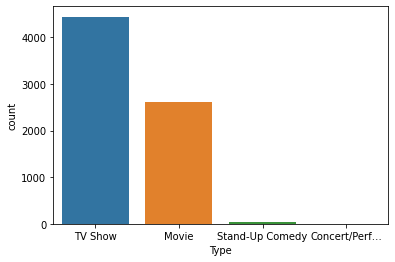

In [13]:
sns.countplot(data = film, x= film['Type'])

**TV Shows dominate the Days in top 10.**

In [120]:
tvshows = film[film['Type']== 'TV Show']
tvshowstop = tvshows.groupby('Title', as_index = False)['Days In Top 10','Netflix Exclusive','Viewership Score'].max().sort_values(by = 'Days In Top 10',ascending = False)[0:10]
tvshowstop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Title,Days In Top 10,Netflix Exclusive,Viewership Score
42,Cocomelon,428,No,1474
157,Ozark,89,Yes,536
40,Cobra Kai,81,No,582
134,Manifest,80,No,590
234,The Queenâs Gambit,73,Yes,446
156,Outer Banks,72,Yes,534
184,Squid Game,66,Yes,495
8,All American,66,No,416
26,Bridgerton,58,Yes,432
129,Lucifer,57,No,415


So Netflix Exclusive Show with the most Days in top 10: Ozark and 536 point of Viewership score

No Netflix Exclusive Show with the most Days in top 10: Cocomelon and 1474 point of Viewership score

**Top TVshows exclusively by Netflix**

In [119]:
tvshowstop[tvshowstop['Netflix Exclusive'] == 'Yes']

,Title,Days In Top 10,Netflix Exclusive
157,Ozark,89,Yes
234,The Queenâs Gambit,73,Yes
156,Outer Banks,72,Yes
184,Squid Game,66,Yes
26,Bridgerton,58,Yes


**Netflix exclusive TV show rates**

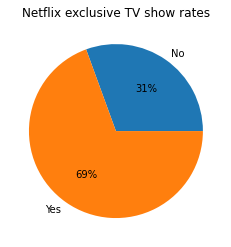

In [118]:
tvshows_report = tvshows.groupby('Netflix Exclusive').count()
tvshows_report
mylabel = ['No','Yes']
plt.pie(tvshows_report['Days In Top 10'], labels = mylabel, autopct='%1.0f%%')
plt.title("Netflix exclusive TV show rates")
plt.show()

In [181]:
film['As of'] = pd.to_datetime(film['As of'])



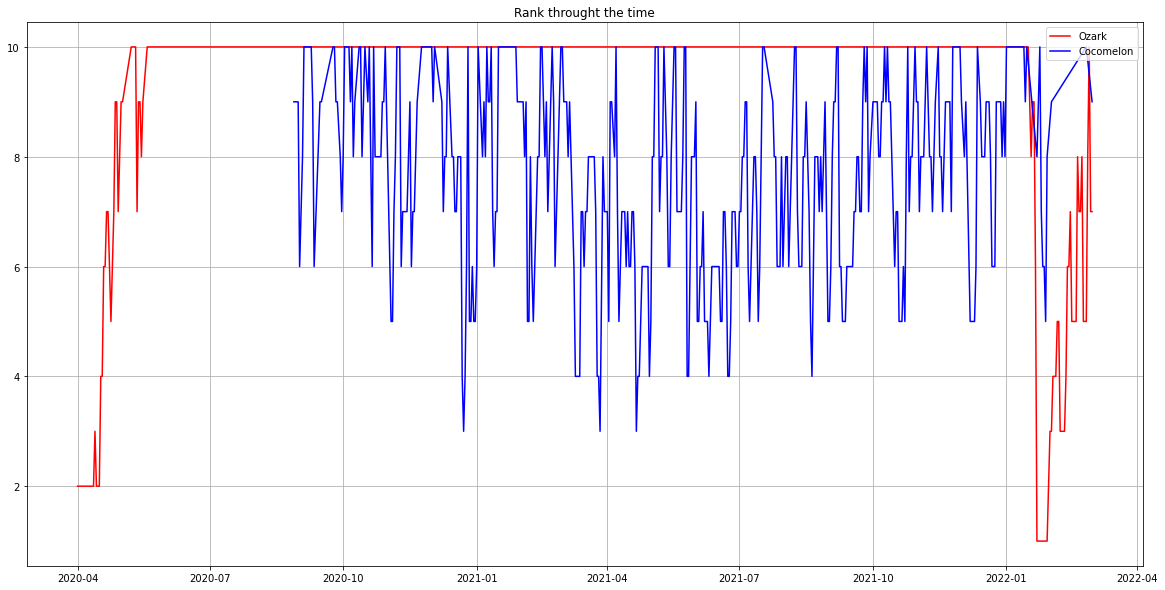

In [189]:
top1Nflx = film[film['Title'] == 'Ozark']
top1Not = film[film['Title'] == 'Cocomelon']
plt.plot(top1Nflx['As of'],top1Nflx['Rank'],color = 'red',label='Ozark')
plt.plot(top1Not['As of'],top1Not['Rank'],color = 'blue',label='Cocomelon')
plt.legend(loc='upper right')
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,10)
plt.title('Rank throught the time')
plt.show()


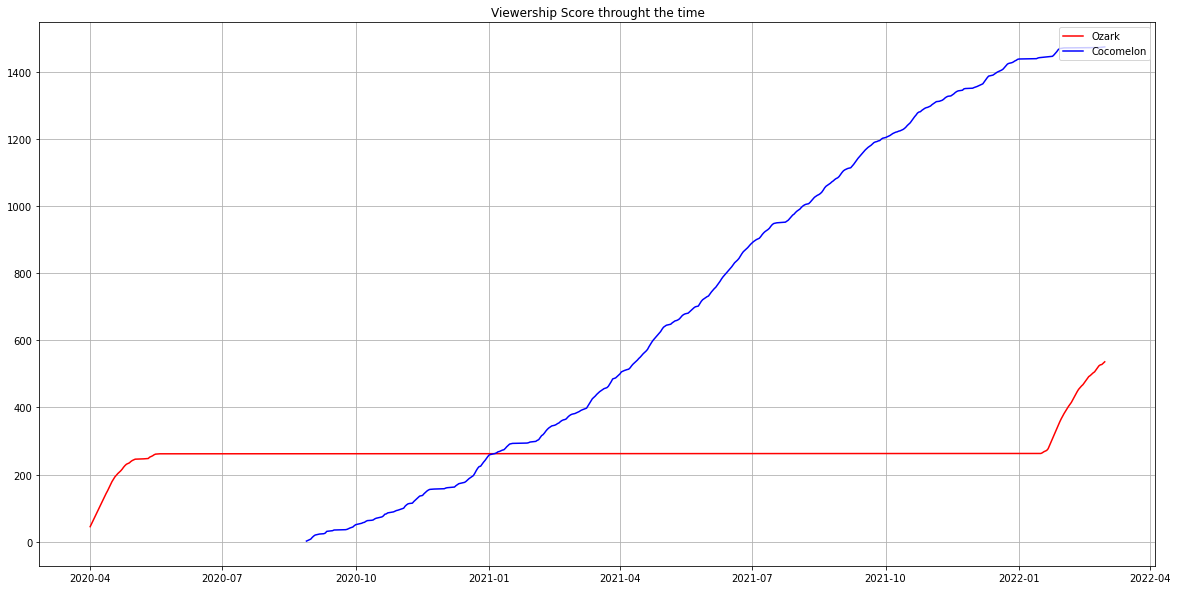

In [190]:
plt.plot(top1Nflx['As of'],top1Nflx['Viewership Score'],color = 'red',label='Ozark')
plt.plot(top1Not['As of'],top1Not['Viewership Score'],color = 'blue',label='Cocomelon')
plt.legend(loc='upper right')
plt.grid(True)
plt.rcParams["figure.figsize"] = (10,20)
plt.title('Viewership Score throught the time')
plt.show()


For this chart i choose the title with the most higher score Ozark (Netflix exclusive ) and Cocomelon(No Netflix exclusive ),as we can see, as the time past, the show "Cocomlon" line unstable in the ranking but the viewership score is getting better, we can assume because more people discover the show and they give better Score